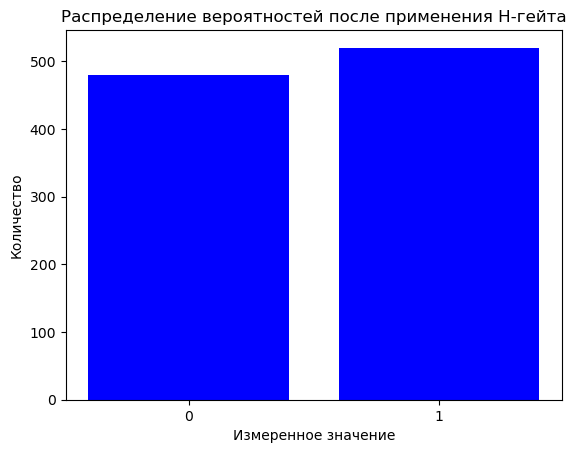

In [24]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import matplotlib.pyplot as plt

# 1. Создаем квантовую схему с 1 кубитом и 1 классическим битом
qc = QuantumCircuit(1, 1)

# 2. Применяем оператор Адамара (H) к кубиту
qc.h(0)

qc.x(0)

# 3. Измеряем кубит
qc.measure(0, 0)

# 4. Запускаем симуляцию без транспиляции
simulator = Aer.get_backend('aer_simulator')  # Используем 'aer_simulator'
qc = qc.copy()  # Делаем копию схемы для безопасности
qc = qc.decompose()  # Декомпозируем схему, если нужно

# 5. Выполняем симуляцию
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

# 6. Визуализируем результат измерений
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel("Измеренное значение")
plt.ylabel("Количество")
plt.title("Распределение вероятностей после применения H-гейта")
plt.show()
